In [142]:
# ライブラリのインポート
from __future__ import print_function
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss      
from sklearn.metrics import roc_auc_score
from pandas import Series,DataFrame

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#CSVファイルの読み込み
test = pd.read_csv("cont_not2.csv",sep=",",header=0)

In [143]:
test.head()

,number,group,Age,SEX,function of thyroid,TG/TPOAb,TRAb,time,Q1,Q2,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q6.1,Q61,Q62
0,1,0,7,0,0.0,0,NaN,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,2,1,0.0,0,NaN,20.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,4,1,0.0,0,NaN,12.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,4,1,0.0,0,NaN,20.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,1,0.0,0,NaN,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [144]:
#欠損データを埋める(TRAbは0,timeは中央値)

test["TRAb"] = test["TRAb"].fillna(0)
test["time"] = test["time"].fillna(test["time"].median())

#DataFrameへの格納
df = pd.DataFrame(test)
#説明変数
x = df.drop(["group","number","function of thyroid","TG/TPOAb","TRAb","Q56"],axis=1).values

# 目的変数
y = df['group'].values
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.05, random_state=2)

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = "gini",max_depth =3,max_features=10)
clf = clf.fit(x_train, y_train)
predicted = clf.predict(x_test)
sum(predicted == y_test)/len(y_test)

0.49206349206349204

In [133]:
#欠損を埋めることができたか確認
test.head()

,number,group,Age,SEX,function of thyroid,TG/TPOAb,TRAb,time,Q1,Q2,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q6.1,Q61,Q62
0,1,0,7,0,0.0,0,0.0,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,2,1,0.0,0,0.0,20.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,4,1,0.0,0,0.0,12.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,4,1,0.0,0,0.0,20.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,1,0.0,0,0.0,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [140]:
tree.export_graphviz(clf, out_file="cont_hashimoto.dot",
                     filled=True,rounded=True)

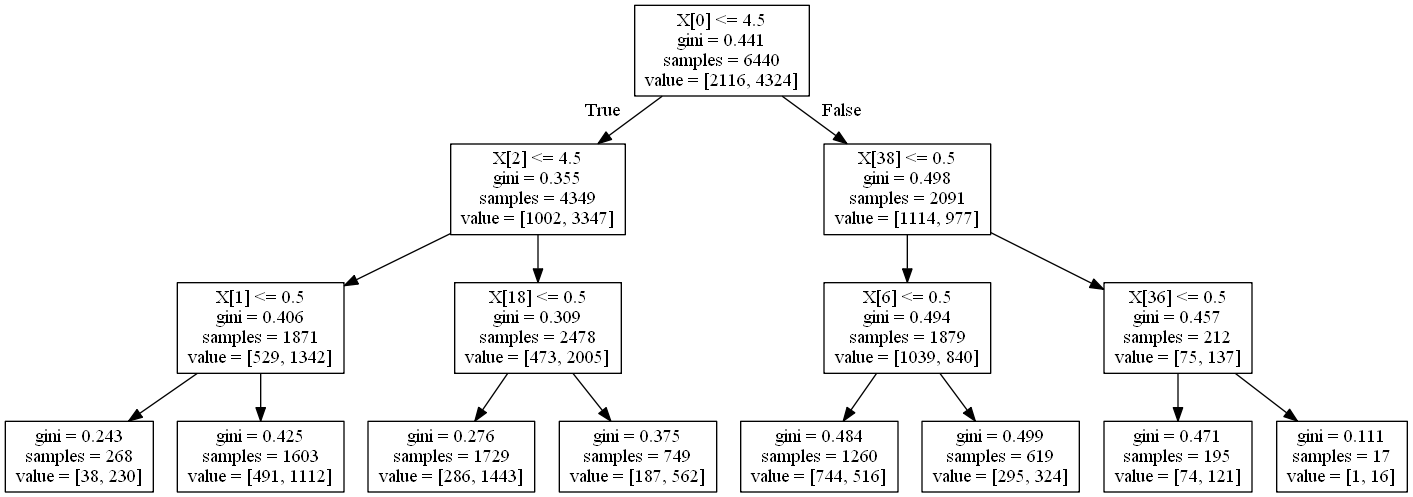

In [141]:
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
from IPython.display import Image
Image(graph.create_png())

[Text(167.4, 190.26, 'X[32] <= 0.5\ngini = 0.49\nsamples = 10104\nvalue = [4336, 5768]'),
 Text(83.7, 135.9, 'X[41] <= 0.5\ngini = 0.489\nsamples = 5625\nvalue = [3231, 2394]'),
 Text(41.85, 81.53999999999999, 'X[39] <= 0.5\ngini = 0.462\nsamples = 4737\nvalue = [3023, 1714]'),
 Text(20.925, 27.180000000000007, 'gini = 0.441\nsamples = 3987\nvalue = [2679, 1308]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.497\nsamples = 750\nvalue = [344, 406]'),
 Text(125.55000000000001, 81.53999999999999, 'X[17] <= 0.5\ngini = 0.359\nsamples = 888\nvalue = [208, 680]'),
 Text(104.625, 27.180000000000007, 'gini = 0.311\nsamples = 768\nvalue = [148, 620]'),
 Text(146.475, 27.180000000000007, 'gini = 0.5\nsamples = 120\nvalue = [60, 60]'),
 Text(251.10000000000002, 135.9, 'X[15] <= 0.5\ngini = 0.372\nsamples = 4479\nvalue = [1105, 3374]'),
 Text(209.25, 81.53999999999999, 'X[33] <= 0.5\ngini = 0.328\nsamples = 4090\nvalue = [844, 3246]'),
 Text(188.32500000000002, 27.180000000000007, 'gin

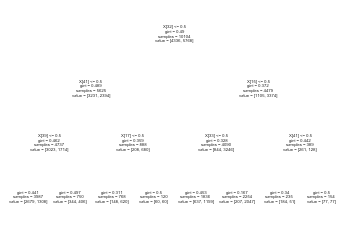

In [16]:
tree.plot_tree(clf)